In [14]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model
import seis_numerics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [15]:
data=kgs.load_all_train_data(validation_only=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.00it/s]


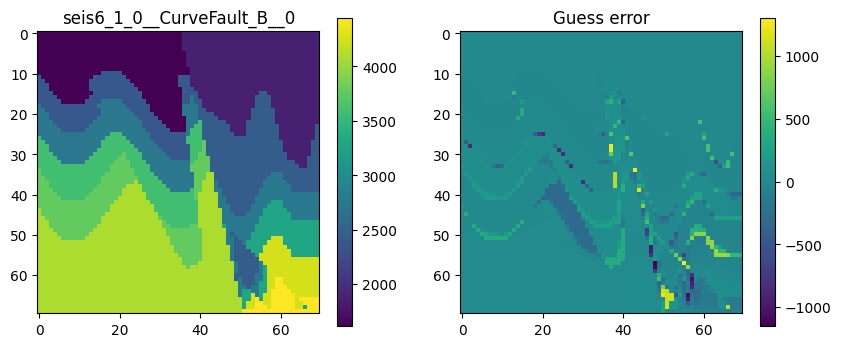

diag 3.250623900849397e-05
vel_to_seis time: 105.51
outside cost_and_gradient_func: 1653.31
total iteration time: 1762.08

vel_to_seis time: 104.35
outside cost_and_gradient_func: 1.00
total iteration time: 108.35

vel_to_seis time: 108.63
outside cost_and_gradient_func: 2.00
total iteration time: 114.63

vel_to_seis time: 104.51
outside cost_and_gradient_func: 1.00
total iteration time: 108.51

vel_to_seis time: 108.04
outside cost_and_gradient_func: 2.01
total iteration time: 115.05

vel_to_seis time: 107.07
outside cost_and_gradient_func: 3.00
total iteration time: 114.06

vel_to_seis time: 108.04
outside cost_and_gradient_func: 4.00
total iteration time: 116.04

vel_to_seis time: 106.85
outside cost_and_gradient_func: 2.00
total iteration time: 111.85

vel_to_seis time: 107.09
outside cost_and_gradient_func: 5.00
total iteration time: 116.09

vel_to_seis time: 105.20
outside cost_and_gradient_func: 6.00
total iteration time: 114.20

vel_to_seis time: 105.40
outside cost_and_gradien

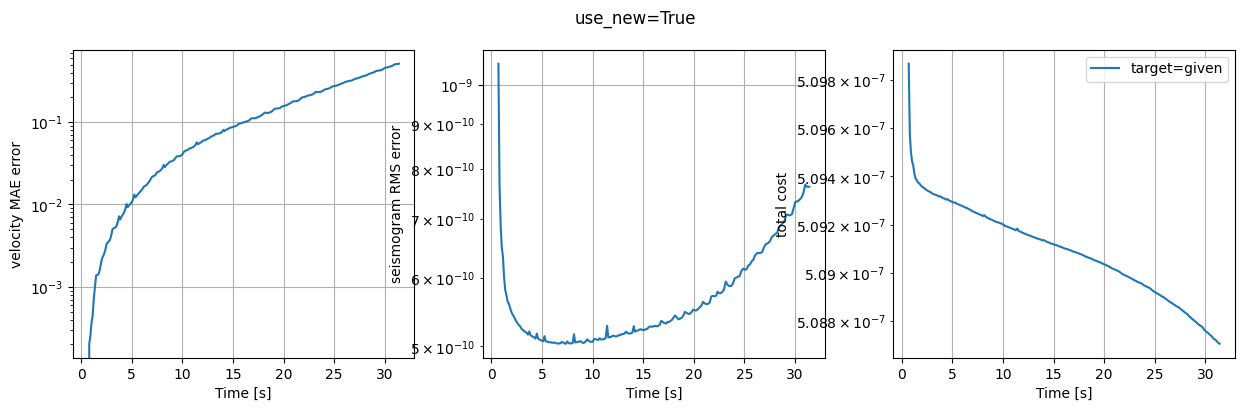

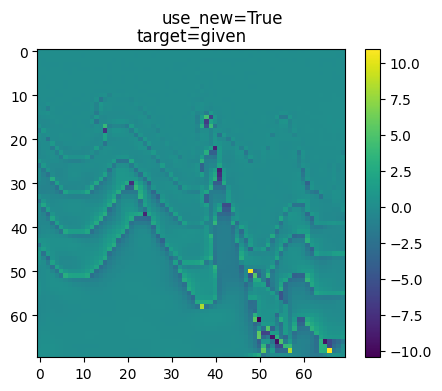

diag 3.250623900849397e-05
vel_to_seis time: 106.51
outside cost_and_gradient_func: 1986.77
total iteration time: 2097.28

vel_to_seis time: 107.50
outside cost_and_gradient_func: 0.00
total iteration time: 111.51

vel_to_seis time: 106.94
outside cost_and_gradient_func: 0.00
total iteration time: 111.94

vel_to_seis time: 105.02
outside cost_and_gradient_func: 1.00
total iteration time: 110.02

vel_to_seis time: 106.10
outside cost_and_gradient_func: 2.00
total iteration time: 111.10

vel_to_seis time: 106.11
outside cost_and_gradient_func: 1.00
total iteration time: 112.11

vel_to_seis time: 105.07
outside cost_and_gradient_func: 2.00
total iteration time: 111.07

vel_to_seis time: 104.84
outside cost_and_gradient_func: 1.00
total iteration time: 107.84

vel_to_seis time: 106.15
outside cost_and_gradient_func: 1.00
total iteration time: 111.15

vel_to_seis time: 108.06
outside cost_and_gradient_func: 1.00
total iteration time: 112.06

vel_to_seis time: 108.06
outside cost_and_gradien

In [ ]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
importlib.reload(seis_numerics)
kgs.profiling=False
seis_invert.profiling=True
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_model.model_TV2D()
model.show_convergence = True
model.iter_list = [200]

do_which_list = [False,True,False]

def param_func(model,value):    
    model.use_new_bfgs=value
    return model
    
param_values = [True,False]
param_name = "use_new"


for d in data[500:502]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)